# Cleaning data

In [3]:
#Import of Packages
import pandas as pd
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as plt

In [391]:
#Load csv fil og lav til panda dataframe
df_org = pd.read_csv("/Users/victoriamariastokholmhundevad/Downloads/GoMore_Data_42443.csv", sep=',', low_memory=False)
df_org.head(4)
#Should be True
len(df_org) == 42443

True

In [392]:
#Without duplicates
df_drop = df_org[df_org.duplicated(['id'], keep=False)]
#If this length = 0 we have 0 duplicates on the id variable, as we expect.
len(df_drop)

0

In [393]:
#Make dummy variable of whether departure in Denmark or not
df_org['Denmark'] = (df_org['latitude_dep'] > 54.564167) & (df_org['latitude_dep'] < 57.748611) & (df_org['longitude_dep'] > 8.075000) & (df_org['longitude_dep'] < 12.790278).astype(int)
df_org.keys()

Index(['id', 'depart_at', 'seats', 'prefs', 'notes', 'free_seats', 'user_id',
       'handle_fee_rate', 'handle_fee_ceiling_factor', 'handle_fee_maximum',
       'accept_cash', 'accept_online_payment', 'quick_booking', 'flex_booking',
       'price', 'car_id', 'currency_id', 'distance', 'detour_preference',
       'overview_polyline', 'duration', 'waypoints_attributes', 'chat', 'kids',
       'music', 'animals', 'comfort', 'smoking', 'id_arr', 'latitude_arr',
       'longitude_arr', 'name_arr', 'id_dep', 'latitude_dep', 'longitude_dep',
       'name_dep', 'Denmark'],
      dtype='object')

# Reduction of dataset to Danish observations
The 40.000 observations is reduced to around 13.000 observations. We limit
the dataset to Denmark (and a bit of Sweden and Germany). We keep the observations where departure and arrival is in Denmark, measured by the longitude and latitude.

In [394]:
denmark_df = df_org[((df_org['latitude_dep'] > 54.564167) & (df_org['latitude_dep'] < 57.748611)) & ((df_org['longitude_dep'] > 8.075000) & (df_org['longitude_dep'] < 12.790278))] 
denmark_df = denmark_df[((denmark_df['latitude_dep'] > 54.564167) & (denmark_df['latitude_dep'] < 57.748611)) & ((denmark_df['longitude_dep'] > 8.075000) & (denmark_df['longitude_dep'] < 12.790278)) & ((denmark_df['latitude_arr'] > 54.564167) & (denmark_df['latitude_arr'] < 57.748611)) & ((denmark_df['longitude_arr'] > 8.075000) & (denmark_df['longitude_arr'] < 12.790278))]
df = denmark_df
#Testing whether we have the right amount of observations
len(df) == 13446

True

In [395]:
#Reset index for the Danish observations
df = df.reset_index(drop=True)
df.head()

,id,depart_at,seats,prefs,notes,free_seats,user_id,handle_fee_rate,handle_fee_ceiling_factor,handle_fee_maximum,...,smoking,id_arr,latitude_arr,longitude_arr,name_arr,id_dep,latitude_dep,longitude_dep,name_dep,Denmark
0,7385002,2018-08-07T15:30:00+02:00,2,"{'chat': '0', 'kids': '1', 'music': '1', 'anim...",Opsamling Rødovre station. Bilen er lille. Ikk...,0,269889,12.5,100,NaN,...,0,25834238,56.025167,9.896857,Smukfest,25834237,55.673514,12.465726,Rødovre,True
1,7385006,2018-08-07T14:00:00+02:00,3,"{'chat': '0', 'kids': '0', 'music': '0', 'anim...",NaN,3,1399528,12.5,100,NaN,...,0,25829883,55.676097,12.568337,København,25829881,56.460584,10.036539,Randers,True
2,7385007,2018-08-09T08:30:00+02:00,1,"{'chat': '0', 'kids': '0', 'music': '0', 'anim...",Afgang fra Vesterbro Brandstation. Tidspunkt k...,0,1438456,12.5,100,NaN,...,0,25829865,55.844405,9.237394,Give,25829864,55.657333,12.538118,Enghavevej 168,True
3,7385010,2018-08-07T06:45:00+02:00,3,"{'chat': '0', 'kids': '1', 'music': '1', 'anim...",NaN,3,906186,12.5,100,NaN,...,0,25829874,56.959168,8.703492,Thisted,25829871,56.484930,8.589933,Struer,True
4,7385011,2018-08-10T16:15:00+02:00,2,"{'chat': '0', 'kids': '1', 'music': '1', 'anim...",NaN,1,2318925,12.5,100,NaN,...,0,25829876,55.713441,9.528237,Nyboesgade,25829875,56.188259,10.184893,Olof Palmes Allé,True


In [396]:
#Dropping the variables 'prefs', 'notes' 'overview_polyline' and 'waypoint_Attributes', since they are already
#unpackes, or, in the case of 'notes' due to ethical considerations.
print(df.keys())
df = df.drop(['prefs', 'notes', 'overview_polyline', 'waypoints_attributes'], 1)

Index(['id', 'depart_at', 'seats', 'prefs', 'notes', 'free_seats', 'user_id',
       'handle_fee_rate', 'handle_fee_ceiling_factor', 'handle_fee_maximum',
       'accept_cash', 'accept_online_payment', 'quick_booking', 'flex_booking',
       'price', 'car_id', 'currency_id', 'distance', 'detour_preference',
       'overview_polyline', 'duration', 'waypoints_attributes', 'chat', 'kids',
       'music', 'animals', 'comfort', 'smoking', 'id_arr', 'latitude_arr',
       'longitude_arr', 'name_arr', 'id_dep', 'latitude_dep', 'longitude_dep',
       'name_dep', 'Denmark'],
      dtype='object')


In [397]:
#Rename datetime column
df = df.rename(columns={'depart_at': 'depart_date_time'})
df.head(3)

,id,depart_date_time,seats,free_seats,user_id,handle_fee_rate,handle_fee_ceiling_factor,handle_fee_maximum,accept_cash,accept_online_payment,...,smoking,id_arr,latitude_arr,longitude_arr,name_arr,id_dep,latitude_dep,longitude_dep,name_dep,Denmark
0,7385002,2018-08-07T15:30:00+02:00,2,0,269889,12.5,100,NaN,False,True,...,0,25834238,56.025167,9.896857,Smukfest,25834237,55.673514,12.465726,Rødovre,True
1,7385006,2018-08-07T14:00:00+02:00,3,3,1399528,12.5,100,NaN,False,True,...,0,25829883,55.676097,12.568337,København,25829881,56.460584,10.036539,Randers,True
2,7385007,2018-08-09T08:30:00+02:00,1,0,1438456,12.5,100,NaN,False,True,...,0,25829865,55.844405,9.237394,Give,25829864,55.657333,12.538118,Enghavevej 168,True


In [398]:
#Creating the variable 'time' with the correct timezone
time = []
for i in range(0, len(df),1):
    time_ = dt.strptime(df['depart_date_time'].iloc[i][:19], "%Y-%m-%dT%H:%M:%S").time()
    time.append(time_)

df['time'] = time
df.keys()

Index(['id', 'depart_date_time', 'seats', 'free_seats', 'user_id',
       'handle_fee_rate', 'handle_fee_ceiling_factor', 'handle_fee_maximum',
       'accept_cash', 'accept_online_payment', 'quick_booking', 'flex_booking',
       'price', 'car_id', 'currency_id', 'distance', 'detour_preference',
       'duration', 'chat', 'kids', 'music', 'animals', 'comfort', 'smoking',
       'id_arr', 'latitude_arr', 'longitude_arr', 'name_arr', 'id_dep',
       'latitude_dep', 'longitude_dep', 'name_dep', 'Denmark', 'time'],
      dtype='object')

In [399]:
#Creating variables date and weekday, month and year
df['date']= pd.to_datetime(pd.Series(df['depart_date_time']).apply(str)).dt.date
df['weekday']= pd.to_datetime(pd.Series(df['depart_date_time']).apply(str)).dt.dayofweek

df['year'] = [str(i)[:4] for i in df['date']]
df['year'] = [int(float(i)) for i in df['year']]
df['year']
df['month'] = [str(i)[5:7] for i in df['date']]
df['month'] = [int(float(i)) for i in df['month']]
df['month']
df.keys()

Index(['id', 'depart_date_time', 'seats', 'free_seats', 'user_id',
       'handle_fee_rate', 'handle_fee_ceiling_factor', 'handle_fee_maximum',
       'accept_cash', 'accept_online_payment', 'quick_booking', 'flex_booking',
       'price', 'car_id', 'currency_id', 'distance', 'detour_preference',
       'duration', 'chat', 'kids', 'music', 'animals', 'comfort', 'smoking',
       'id_arr', 'latitude_arr', 'longitude_arr', 'name_arr', 'id_dep',
       'latitude_dep', 'longitude_dep', 'name_dep', 'Denmark', 'time', 'date',
       'weekday', 'year', 'month'],
      dtype='object')

In [400]:
#Creating variable week number
df['week_number_date'] = pd.to_datetime(pd.Series(df['depart_date_time']))

week_number =[]
for i in range(0,len(df),1):
    week_number_ = df.week_number_date[i].isocalendar()[1]
    week_number.append(week_number_)
    

df['week_number'] = week_number

In [401]:
#Make dummy variable telling if the departure is from Sjælland (1) or not (0)
df['SJ_dep'] = (df['latitude_dep'] > 54.564167) & (df['latitude_dep'] < 57.748611) & (df['longitude_dep'] > 10.958935) & (df['longitude_dep'] < 12.790278)

#Make dummy variable of whether the arrival is at Sjælland (1) or not (0)
df['SJ_arr'] = (df['latitude_arr'] > 54.564167) & (df['latitude_arr'] < 57.748611) & (df['longitude_arr'] > 10.958935) & (df['longitude_arr'] < 12.790278)


#Function taking in True og False, returning 1 or 0
def to_bool(s):
    return 1 if s == True else 0

#Convert the boolean for SJ_dep from True/False to 1/0
SJ_dep_int = []
for i in range(0,len(df),1):
    SJ_dep_int.append(to_bool(df.iloc[i]['SJ_dep']))
    
df['SJ_dep_int'] = SJ_dep_int

#Converts the boolean for SJ_arr from True/False to 1/0
SJ_arr_int = []
for i in range(0,len(df),1):
    SJ_arr_int.append(to_bool(df.iloc[i]['SJ_arr']))
    
df['SJ_arr_int'] = SJ_arr_int

df.head()

,id,depart_date_time,seats,free_seats,user_id,handle_fee_rate,handle_fee_ceiling_factor,handle_fee_maximum,accept_cash,accept_online_payment,...,date,weekday,year,month,week_number_date,week_number,SJ_dep,SJ_arr,SJ_dep_int,SJ_arr_int
0,7385002,2018-08-07T15:30:00+02:00,2,0,269889,12.5,100,NaN,False,True,...,2018-08-07,1,2018,8,2018-08-07 13:30:00,32,True,False,1,0
1,7385006,2018-08-07T14:00:00+02:00,3,3,1399528,12.5,100,NaN,False,True,...,2018-08-07,1,2018,8,2018-08-07 12:00:00,32,False,True,0,1
2,7385007,2018-08-09T08:30:00+02:00,1,0,1438456,12.5,100,NaN,False,True,...,2018-08-09,3,2018,8,2018-08-09 06:30:00,32,True,False,1,0
3,7385010,2018-08-07T06:45:00+02:00,3,3,906186,12.5,100,NaN,False,True,...,2018-08-07,1,2018,8,2018-08-07 04:45:00,32,False,False,0,0
4,7385011,2018-08-10T16:15:00+02:00,2,1,2318925,12.5,100,NaN,False,True,...,2018-08-10,4,2018,8,2018-08-10 14:15:00,32,False,False,0,0


In [402]:
# accept_cash to boolean with integer
accept_cash = []
for i in range(0,len(df),1):
    accept_cash.append(to_bool(df.iloc[i]['accept_cash']))
    
df['accept_cash_int'] = accept_cash


In [403]:
#accept online payment to boolean with integer
accept_online_payment = []
for i in range(0,len(df),1):
    accept_online_payment.append(to_bool(df.iloc[i]['accept_online_payment']))
    
df['accept_online_payment_int'] = accept_online_payment

In [404]:
#quick_booking to boolean with integer
quick_booking = []
for i in range(0,len(df),1):
    quick_booking.append(to_bool(df.iloc[i]['quick_booking']))
    
df['quick_booking_int'] = quick_booking

In [405]:
#flex_booking to boolean with integer
flex_booking = []
for i in range(0,len(df),1):
    flex_booking.append(to_bool(df.iloc[i]['flex_booking']))
    
df['flex_booking_int'] = flex_booking

In [406]:
#Make the categorical variable 'detour preference', to dummies, which can be used in the model
dummies = pd.get_dummies(df.detour_preference)
df['det_15_minutes'] = dummies.iloc[:,0]
df['det_5_minutes'] = dummies.iloc[:,1]
df['det_flexible'] = dummies.iloc[:,2]
df['det_none'] = dummies.iloc[:,3]
df.head()

,id,depart_date_time,seats,free_seats,user_id,handle_fee_rate,handle_fee_ceiling_factor,handle_fee_maximum,accept_cash,accept_online_payment,...,SJ_dep_int,SJ_arr_int,accept_cash_int,accept_online_payment_int,quick_booking_int,flex_booking_int,det_15_minutes,det_5_minutes,det_flexible,det_none
0,7385002,2018-08-07T15:30:00+02:00,2,0,269889,12.5,100,NaN,False,True,...,1,0,0,1,1,1,0,1,0,0
1,7385006,2018-08-07T14:00:00+02:00,3,3,1399528,12.5,100,NaN,False,True,...,0,1,0,1,1,1,0,0,1,0
2,7385007,2018-08-09T08:30:00+02:00,1,0,1438456,12.5,100,NaN,False,True,...,1,0,0,1,1,1,0,1,0,0
3,7385010,2018-08-07T06:45:00+02:00,3,3,906186,12.5,100,NaN,False,True,...,0,0,0,1,1,1,0,1,0,0
4,7385011,2018-08-10T16:15:00+02:00,2,1,2318925,12.5,100,NaN,False,True,...,0,0,0,1,0,1,0,1,0,0


In [407]:
#Convert price to DKK
df['price_DKK'] = df['price']/100
#Comvert distance to KM
df['distance_KM'] = df['distance']/1000
#New variable - Price/distance
df['DKK_per_KM'] = df['price_DKK']*1/df['distance_KM']*1
#New variable - taken_seats
df['taken_seats'] = df['seats'] - df['free_seats']
df.head()

,id,depart_date_time,seats,free_seats,user_id,handle_fee_rate,handle_fee_ceiling_factor,handle_fee_maximum,accept_cash,accept_online_payment,...,quick_booking_int,flex_booking_int,det_15_minutes,det_5_minutes,det_flexible,det_none,price_DKK,distance_KM,DKK_per_KM,taken_seats
0,7385002,2018-08-07T15:30:00+02:00,2,0,269889,12.5,100,NaN,False,True,...,1,1,0,1,0,0,185.0,271.775,0.680710,2
1,7385006,2018-08-07T14:00:00+02:00,3,3,1399528,12.5,100,NaN,False,True,...,1,1,0,0,1,0,180.0,343.083,0.524654,0
2,7385007,2018-08-09T08:30:00+02:00,1,0,1438456,12.5,100,NaN,False,True,...,1,1,0,1,0,0,150.0,268.189,0.559307,1
3,7385010,2018-08-07T06:45:00+02:00,3,3,906186,12.5,100,NaN,False,True,...,1,1,0,1,0,0,35.0,73.159,0.478410,0
4,7385011,2018-08-10T16:15:00+02:00,2,1,2318925,12.5,100,NaN,False,True,...,0,1,0,1,0,0,55.0,74.306,0.740182,1


In [408]:
#Creating a dummy variable, telling if the tour crosses Storebælt (1) (toll_road) or not (0)
df['toll_road'] = (df['SJ_dep_int']) + (df['SJ_arr_int'])

toll_road = []
for i in range(0, len(df)):
    if (df['toll_road'][i]) == 1:
        toll_road.append(1)
    else:
        toll_road.append(0)

df['toll_road_bool'] = toll_road
print(df.columns)

Index(['id', 'depart_date_time', 'seats', 'free_seats', 'user_id',
       'handle_fee_rate', 'handle_fee_ceiling_factor', 'handle_fee_maximum',
       'accept_cash', 'accept_online_payment', 'quick_booking', 'flex_booking',
       'price', 'car_id', 'currency_id', 'distance', 'detour_preference',
       'duration', 'chat', 'kids', 'music', 'animals', 'comfort', 'smoking',
       'id_arr', 'latitude_arr', 'longitude_arr', 'name_arr', 'id_dep',
       'latitude_dep', 'longitude_dep', 'name_dep', 'Denmark', 'time', 'date',
       'weekday', 'year', 'month', 'week_number_date', 'week_number', 'SJ_dep',
       'SJ_arr', 'SJ_dep_int', 'SJ_arr_int', 'accept_cash_int',
       'accept_online_payment_int', 'quick_booking_int', 'flex_booking_int',
       'det_15_minutes', 'det_5_minutes', 'det_flexible', 'det_none',
       'price_DKK', 'distance_KM', 'DKK_per_KM', 'taken_seats', 'toll_road',
       'toll_road_bool'],
      dtype='object')


In [409]:
#New variable - making time into a categorical variable
df['time_hour'] = pd.to_datetime(pd.Series(df['time']).apply(str)).dt.hour
df['time_minute'] = pd.to_datetime(pd.Series(df['time']).apply(str)).dt.minute
df['time_minute_hour'] = df['time_hour']*1 + df['time_minute']/60

#Creating new variable. Split the time into categorical values
df['time_cat'] = pd.cut(df.time_minute_hour, [0,6,9,12,15,18,21,24] , 
                        labels=["Night", "Morning", "Forenoon", "Noon", "Afternoon","Evening", "Late_evening"], 
                        include_lowest=True)

#Creating dummies, so the categorical variables can be included in the model
dummies = pd.get_dummies(df.time_cat)
df = pd.concat([df, dummies], axis=1)


In [410]:
#Remove outliers with unrealistic high or unrealistic low distance (removing 6 observations)

#See the outliers here:
print(df\
    .groupby('distance_KM')\
    ['id']\
    .count())

#Define the outliers:
outlier = (df['distance'] > 1500000) | (df['distance'] ==0.0)
print(df[outlier]['name_dep'])
print(df[outlier]['name_arr'])

#Drop outliers
df = df.drop(df[outlier == True].index)

#Should be true
len(df) == 13440

distance_KM
0.000        4
4.941        1
5.817        1
6.336        1
7.493        1
8.314        1
8.335        2
8.972       45
9.324        1
10.346       1
10.409       1
10.592       1
11.565       2
11.881       1
12.241       1
12.361       7
12.687       6
13.690       1
13.890       1
14.255       1
15.076       1
15.660       7
15.666       1
15.981       1
16.220       1
17.378       1
17.860       1
18.035       1
18.045       1
18.302       3
            ..
481.881      1
482.416      1
483.776      1
486.512      1
491.393      1
491.949      1
493.539      1
494.282      1
494.794      1
504.639      1
505.197      1
508.013      1
512.422      1
521.592      1
529.942      1
536.813      1
536.891      1
541.234      1
611.000      1
615.715      1
616.554      1
617.714      1
661.827      1
661.898      1
692.025      1
779.928      1
850.099      1
924.285      1
1989.218     1
2375.380     1
Name: id, Length: 6830, dtype: int64
3980                    Skibby
4322 

True

In [411]:
#Checking handle_fee_ceiling_factor - only 7 observations does not have the value 100
df_handle = df['handle_fee_ceiling_factor']!=100
df[df_handle]

print(df\
    .groupby('handle_fee_ceiling_factor')\
    ['id']\
    .count())

#Checking handle_fee_rate - only 7 observations does not have the value 12.5 ( the same 7 observations as before)
df_handle_fee = df['handle_fee_rate']!=12.5
df[df_handle_fee] == df[df_handle]

print(df\
    .groupby('handle_fee_rate')\
    ['id']\
    .count())


handle_fee_ceiling_factor
10         7
100    13433
Name: id, dtype: int64
handle_fee_rate
0.0         4
10.0        3
12.5    13433
Name: id, dtype: int64


**Variables to be removed and why:**

In [412]:
#Handle_fee_maximum consists of 13441 missing observations, so we omit this variable
print(df\
    .groupby('handle_fee_maximum')\
    ['id']\
    .count())

handle_fee_maximum
100.0    3
Name: id, dtype: int64


In [413]:
df = df.drop(['handle_fee_maximum'], 1)

In [ ]:
f, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(1, 5, figsize=(15,5), constrained_layout=True)
sns.set_style('whitegrid')
sns.despine(top=True, right=True, left=True)
sns.countplot(x="music", data=df, ax=ax0, palette='GnBu')
sns.countplot(x="kids", data=df, ax=ax1, palette='GnBu')
sns.countplot(x="animals", data=df, ax=ax2, palette='GnBu')
sns.countplot(x="smoking", data=df, ax=ax3, palette= 'GnBu')
sns.countplot(x="chat", data=df, ax=ax4, color= '#c2e7c0')

ax0.set_ylabel('')
ax0.set_xlabel('Music', fontsize=15)
ax0.set_xticklabels(labels=('No', 'Yes'), fontsize=15)

ax1.set_ylabel('')
ax1.set_xlabel('Kids', fontsize=15)
ax1.set_xticklabels(labels=('No', 'Yes'), fontsize=15)

ax2.set_ylabel('')
ax2.set_xlabel('Animals', fontsize=15)
ax2.set_xticklabels(labels=('No', 'Yes'), fontsize=15)

ax3.set_ylabel('')
ax3.set_xlabel('Smoking', fontsize=15)
ax3.set_xticklabels(labels=('No', 'Yes'), fontsize=15)

ax4.set_ylabel('')
ax4.set_xlabel('Chat', fontsize=15)
ax4.set_xticklabels(labels=('No', 'Yes'), fontsize=15)

f.suptitle("Driver's Preferences", fontsize=20)

plt.savefig("barplot_descriptive2.png")

In [414]:
#'Chat' is 0 for all observations, so we omit this variable
print(df\
    .groupby('chat')\
    ['id']\
    .count())

chat
0    13440
Name: id, dtype: int64


In [415]:
df = df.drop(['chat'], 1)

**Inspecting the different values of the variables:**

In [416]:
#Check how many seats the drivers are offering
print(df\
    .groupby('seats')\
    ['id']\
    .count())
#The drivers offer between 1 and 10 seats during a ride

seats
1      926
2     2500
3     8588
4     1189
5      168
6       17
7       36
8       13
9        2
10       1
Name: id, dtype: int64


In [417]:
#Checking how many rides accept cash:
print(df\
    .groupby('accept_cash')\
    ['id']\
    .count() )
#38 out of 13440 rides accept cash

# 13402 rides out of 13440 accept online payment, 38 rides where online payment isn't accepted:
print(df\
    .groupby('accept_online_payment')\
    ['id']\
    .count() )
#Investigate if these 38 are the same (id)

accept_cash
False    13402
True        38
Name: id, dtype: int64
accept_online_payment
False       38
True     13402
Name: id, dtype: int64


In [418]:
df.keys()

Index(['id', 'depart_date_time', 'seats', 'free_seats', 'user_id',
       'handle_fee_rate', 'handle_fee_ceiling_factor', 'accept_cash',
       'accept_online_payment', 'quick_booking', 'flex_booking', 'price',
       'car_id', 'currency_id', 'distance', 'detour_preference', 'duration',
       'kids', 'music', 'animals', 'comfort', 'smoking', 'id_arr',
       'latitude_arr', 'longitude_arr', 'name_arr', 'id_dep', 'latitude_dep',
       'longitude_dep', 'name_dep', 'Denmark', 'time', 'date', 'weekday',
       'year', 'month', 'week_number_date', 'week_number', 'SJ_dep', 'SJ_arr',
       'SJ_dep_int', 'SJ_arr_int', 'accept_cash_int',
       'accept_online_payment_int', 'quick_booking_int', 'flex_booking_int',
       'det_15_minutes', 'det_5_minutes', 'det_flexible', 'det_none',
       'price_DKK', 'distance_KM', 'DKK_per_KM', 'taken_seats', 'toll_road',
       'toll_road_bool', 'time_hour', 'time_minute', 'time_minute_hour',
       'time_cat', 'Night', 'Morning', 'Forenoon', 'Noon', 'Aft

In [419]:
#Drop all unecessary variables: 'distance', 'price', 'Denmark', which we have remade into more usable formats
df = df.drop(['distance', 'price', 'Denmark'], 1)

In [420]:
#Since we have 2809 missing observations in car_id, we delete this variable
#The 39 missing observations in the variable flex_booking, force us to delete 39 out of 13440 observations - however we do not believe that it affects the data much
df.isnull().sum()

id                              0
depart_date_time                0
seats                           0
free_seats                      0
user_id                         0
handle_fee_rate                 0
handle_fee_ceiling_factor       0
accept_cash                     0
accept_online_payment           0
quick_booking                   0
flex_booking                   39
car_id                       2809
currency_id                     0
detour_preference               0
duration                        0
kids                            0
music                           0
animals                         0
comfort                         0
smoking                         0
id_arr                          0
latitude_arr                    0
longitude_arr                   0
name_arr                        0
id_dep                          0
latitude_dep                    0
longitude_dep                   0
name_dep                        0
time                            0
date          

In [421]:
#Drop the variable 'car_id'
df = df.drop(['car_id'], 1)

In [422]:
#Drop observations with Nan
df = df.dropna(0)

In [423]:
#Know we have 0 Nan
df.isnull().sum().sum()

0

In [424]:
print(len(df))
print(df.keys())

13401
Index(['id', 'depart_date_time', 'seats', 'free_seats', 'user_id',
       'handle_fee_rate', 'handle_fee_ceiling_factor', 'accept_cash',
       'accept_online_payment', 'quick_booking', 'flex_booking', 'currency_id',
       'detour_preference', 'duration', 'kids', 'music', 'animals', 'comfort',
       'smoking', 'id_arr', 'latitude_arr', 'longitude_arr', 'name_arr',
       'id_dep', 'latitude_dep', 'longitude_dep', 'name_dep', 'time', 'date',
       'weekday', 'year', 'month', 'week_number_date', 'week_number', 'SJ_dep',
       'SJ_arr', 'SJ_dep_int', 'SJ_arr_int', 'accept_cash_int',
       'accept_online_payment_int', 'quick_booking_int', 'flex_booking_int',
       'det_15_minutes', 'det_5_minutes', 'det_flexible', 'det_none',
       'price_DKK', 'distance_KM', 'DKK_per_KM', 'taken_seats', 'toll_road',
       'toll_road_bool', 'time_hour', 'time_minute', 'time_minute_hour',
       'time_cat', 'Night', 'Morning', 'Forenoon', 'Noon', 'Afternoon',
       'Evening', 'Late_evening'],

In [425]:
#Save the file, and delete the old file in Github before uploading this one (same name)
#df.to_csv('GoMore_Data_DK_270818.csv', index=False)

# Who uses GoMore - Geographical overview

In [4]:
#Importing the relevant packages - NB Geopandas need to be installed before import is possible
import geopandas as gp #you have to install panda first with the command "conda install geopanda"
from shapely.geometry import Point
import seaborn as sns 

%matplotlib inline

# Geopanda for total departure

In [427]:
#Using the whole sample to see departure patterns
sample_dep = df

In [428]:
# Using the longitude and latitude for departure as coordinates
sample_dep['Coordinates'] = list(zip(sample_dep.longitude_dep, sample_dep.latitude_dep))
sample_dep['Coordinates'] = sample_dep['Coordinates'].apply(Point)
gdp = gp.GeoDataFrame(sample_dep, geometry='Coordinates')
gdp.head()

,id,depart_date_time,seats,free_seats,user_id,handle_fee_rate,handle_fee_ceiling_factor,accept_cash,accept_online_payment,quick_booking,...,time_minute_hour,time_cat,Night,Morning,Forenoon,Noon,Afternoon,Evening,Late_evening,Coordinates
0,7385002,2018-08-07T15:30:00+02:00,2,0,269889,12.5,100,False,True,True,...,15.50,Afternoon,0,0,0,0,1,0,0,POINT (12.465726 55.673514)
1,7385006,2018-08-07T14:00:00+02:00,3,3,1399528,12.5,100,False,True,True,...,14.00,Noon,0,0,0,1,0,0,0,POINT (10.036539 56.460584)
2,7385007,2018-08-09T08:30:00+02:00,1,0,1438456,12.5,100,False,True,True,...,8.50,Morning,0,1,0,0,0,0,0,POINT (12.5381179 55.657333)
3,7385010,2018-08-07T06:45:00+02:00,3,3,906186,12.5,100,False,True,True,...,6.75,Morning,0,1,0,0,0,0,0,POINT (8.589933 56.48493000000001)
4,7385011,2018-08-10T16:15:00+02:00,2,1,2318925,12.5,100,False,True,False,...,16.25,Afternoon,0,0,0,0,1,0,0,POINT (10.1848928 56.188259)


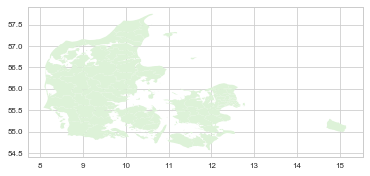

In [429]:
#Including map from http://www.diva-gis.org/datadown (also see bibliography)
shp = gp.GeoDataFrame.from_file('/Users/victoriamariastokholmhundevad/Downloads/DNK_adm/DNK_adm2.shp') 
shp.plot()

In [430]:
#Converting the coordinates to same format
shp.crs = {'init': 'epsg:4326'} 
gdp.crs = {'init': 'epsg:4326'}

dk_rides_dep = gp.tools.sjoin(gdp, shp, how="right", op='intersects')

In [431]:
#Getting number of rides per municipality (here called district) 
num_rides_per_district_dep = dk_rides_dep.groupby("NAME_2").size()
num_rides_per_district_dep = num_rides_per_district_dep.to_frame(name="dep_num").reset_index()

In [432]:
#Merging the dataset with the map of Denmark
dep_df_num = pd.merge(shp, num_rides_per_district_dep, on="NAME_2", how="right")

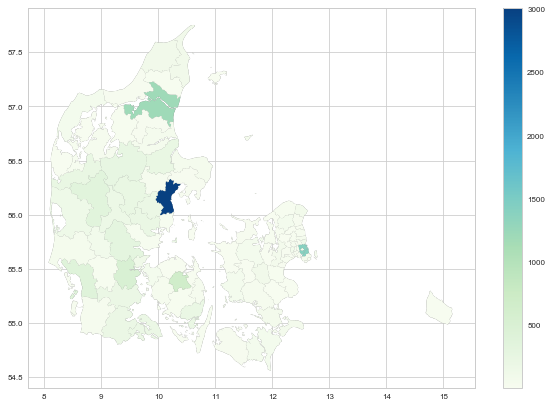

In [433]:
#Creating the figure for total departures
fig, ax = plt.subplots(1, figsize=(10,7))
base = shp.plot(ax=ax, color='gray')
#gdf.plot(ax=base, marker="o", markersize=5, alpha=0.5)
dep_df_num.plot(ax=base, column='dep_num', cmap='GnBu', alpha=1, legend=True)
leg = ax.get_legend()
#Saving figure to use in project document
fig.savefig('departure.png')

# Geopandas for total arrival

In [434]:
#Creating version of dataframe to use for total arrival
sample_arr = df 

In [435]:
# Using the longitude and latitude for departure as coordinates
sample_arr['Coordinates'] = list(zip(sample_arr.longitude_arr, sample_arr.latitude_arr))
sample_arr['Coordinates'] = sample_arr['Coordinates'].apply(Point)
garr = gp.GeoDataFrame(sample_arr, geometry='Coordinates')
garr.head()

,id,depart_date_time,seats,free_seats,user_id,handle_fee_rate,handle_fee_ceiling_factor,accept_cash,accept_online_payment,quick_booking,...,time_minute_hour,time_cat,Night,Morning,Forenoon,Noon,Afternoon,Evening,Late_evening,Coordinates
index_left,,,,,,,,,,,,,,,,,,,,,
0,7385002,2018-08-07T15:30:00+02:00,2,0,269889,12.5,100,False,True,True,...,15.50,Afternoon,0,0,0,0,1,0,0,POINT (9.8968571 56.0251671)
1,7385006,2018-08-07T14:00:00+02:00,3,3,1399528,12.5,100,False,True,True,...,14.00,Noon,0,0,0,1,0,0,0,POINT (12.5683372 55.6760968)
2,7385007,2018-08-09T08:30:00+02:00,1,0,1438456,12.5,100,False,True,True,...,8.50,Morning,0,1,0,0,0,0,0,POINT (9.237394 55.844405)
3,7385010,2018-08-07T06:45:00+02:00,3,3,906186,12.5,100,False,True,True,...,6.75,Morning,0,1,0,0,0,0,0,POINT (8.7034921 56.95916800000001)
4,7385011,2018-08-10T16:15:00+02:00,2,1,2318925,12.5,100,False,True,False,...,16.25,Afternoon,0,0,0,0,1,0,0,POINT (9.5282372 55.7134411)


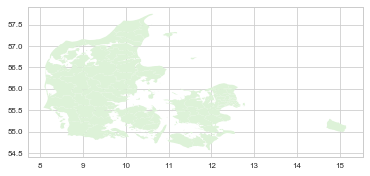

In [436]:
#Including map from http://www.diva-gis.org/datadown (also see bibliography)
shp = gp.GeoDataFrame.from_file('/Users/victoriamariastokholmhundevad/Downloads/DNK_adm/DNK_adm2.shp') #denne virker kun hos Emma - læg op
shp.plot()

In [437]:
#Converting the coordinates to same format
shp.crs = {'init': 'epsg:4326'} 
garr.crs = {'init': 'epsg:4326'}

dk_rides_arr = gp.tools.sjoin(garr, shp, how="right", op='intersects')
dk_rides_arr.head()

,index_left,id,depart_date_time,seats,free_seats,user_id,handle_fee_rate,handle_fee_ceiling_factor,accept_cash,accept_online_payment,...,NAME_0,ID_1,NAME_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
index_right,,,,,,,,,,,,,,,,,,,,,
44,0.0,7385002.0,2018-08-07T15:30:00+02:00,2.0,0.0,269889.0,12.5,100.0,False,True,...,Denmark,2,Midtjylland,45,Skanderborg,Kommune,Municipality,None,None,(POLYGON ((10.01367568969732 55.98131561279308...
44,5.0,7385035.0,2018-08-06T20:30:00+02:00,3.0,3.0,734681.0,12.5,100.0,False,True,...,Denmark,2,Midtjylland,45,Skanderborg,Kommune,Municipality,None,None,(POLYGON ((10.01367568969732 55.98131561279308...
44,149.0,7385709.0,2018-08-07T12:40:00+02:00,5.0,0.0,57855.0,12.5,100.0,False,True,...,Denmark,2,Midtjylland,45,Skanderborg,Kommune,Municipality,None,None,(POLYGON ((10.01367568969732 55.98131561279308...
44,211.0,7386006.0,2018-08-07T07:30:00+02:00,3.0,3.0,541988.0,12.5,100.0,False,True,...,Denmark,2,Midtjylland,45,Skanderborg,Kommune,Municipality,None,None,(POLYGON ((10.01367568969732 55.98131561279308...
44,242.0,7386127.0,2018-08-07T10:20:00+02:00,2.0,2.0,267139.0,12.5,100.0,False,True,...,Denmark,2,Midtjylland,45,Skanderborg,Kommune,Municipality,None,None,(POLYGON ((10.01367568969732 55.98131561279308...


In [438]:
#Getting number of rides per district
num_rides_per_district_arr = dk_rides_arr.groupby("NAME_2").size()
num_rides_per_district_arr = num_rides_per_district_arr.to_frame(name="arr_num").reset_index()
num_rides_per_district_arr.head()


,NAME_2,arr_num
0,Aabenraa,164
1,Aalborg,1168
2,Albertslund,106
3,Allerød,10
4,Assens,41


In [439]:
#Establishing cut categories
arr_ride_num = pd.merge(shp, num_rides_per_district_arr, on="NAME_2", how="right")

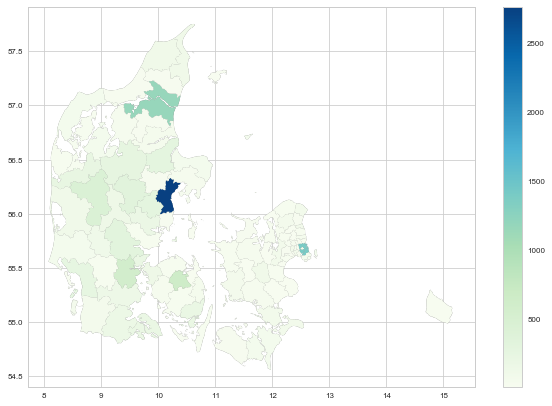

In [440]:
#Plotting total number of arrivals in Denmark
fig, ax = plt.subplots(1,figsize=(10,7))
base = shp.plot(ax=ax, color='gray')
#gdf.plot(ax=base, marker="o", markersize=5, alpha=0.5)
arr_ride_num.plot(ax=base, column='arr_num',cmap='GnBu', alpha=1, legend=True)
leg = ax.get_legend()
fig.savefig('arrival.png')

# Plotting drives per capita in Municipalities

In [441]:
#Creating the new dataframe with population data and renaming the values, that do not match our geomap. This will be used for both departure and arrival
pop_mun = pd.read_excel('/Users/victoriamariastokholmhundevad/Desktop/Egen kopi 1/201882810298227085411BY2.xlsx', index_col=None)
pop_mun.to_csv('pop_mun.csv', encoding='utf-8')
pop_mun = pd.read_csv('pop_mun.csv')
pop_mun = pop_mun.dropna().reset_index(drop=True)
pop_mun = pop_mun.drop('Unnamed: 0', 1)
pop_mun.columns = ['NAME_2', 'Pop']
pop_mun.at[79, 'NAME_2'] = 'Århus'
pop_mun.at[97, 'NAME_2'] = 'Vesthimmerland'
pop_mun.at[12, 'NAME_2'] = 'Høje Taastrup'
print(pop_mun.head())

          NAME_2       Pop
0      København  613288.0
1  Frederiksberg  104410.0
2         Dragør   14272.0
3         Tårnby   43063.0
4    Albertslund   27743.0


In [442]:
#Creating the sample for relative departures
sample_pcd = df

In [443]:
# Using the longitude and latitude for departure as coordinates
sample_pcd['Coordinates'] = list(zip(sample_pcd.longitude_dep, sample_pcd.latitude_dep))
sample_pcd['Coordinates'] = sample_pcd['Coordinates'].apply(Point)
gdp_pcd = gp.GeoDataFrame(sample_pcd, geometry='Coordinates')
gdp_pcd.head()

,id,depart_date_time,seats,free_seats,user_id,handle_fee_rate,handle_fee_ceiling_factor,accept_cash,accept_online_payment,quick_booking,...,time_minute_hour,time_cat,Night,Morning,Forenoon,Noon,Afternoon,Evening,Late_evening,Coordinates
index_left,,,,,,,,,,,,,,,,,,,,,
0,7385002,2018-08-07T15:30:00+02:00,2,0,269889,12.5,100,False,True,True,...,15.50,Afternoon,0,0,0,0,1,0,0,POINT (12.465726 55.673514)
1,7385006,2018-08-07T14:00:00+02:00,3,3,1399528,12.5,100,False,True,True,...,14.00,Noon,0,0,0,1,0,0,0,POINT (10.036539 56.460584)
2,7385007,2018-08-09T08:30:00+02:00,1,0,1438456,12.5,100,False,True,True,...,8.50,Morning,0,1,0,0,0,0,0,POINT (12.5381179 55.657333)
3,7385010,2018-08-07T06:45:00+02:00,3,3,906186,12.5,100,False,True,True,...,6.75,Morning,0,1,0,0,0,0,0,POINT (8.589933 56.48493000000001)
4,7385011,2018-08-10T16:15:00+02:00,2,1,2318925,12.5,100,False,True,False,...,16.25,Afternoon,0,0,0,0,1,0,0,POINT (10.1848928 56.188259)


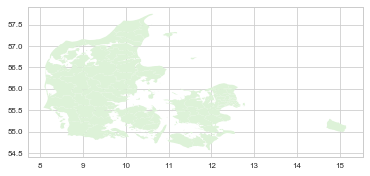

In [444]:
#Including map from http://www.diva-gis.org/datadown (also see bibliography)
shp = gp.GeoDataFrame.from_file('/Users/victoriamariastokholmhundevad/Downloads/DNK_adm/DNK_adm2.shp') #denne virker kun hos Emma - læg op
shp.plot()

In [445]:
#Converting the coordinates to same format
shp.crs = {'init': 'epsg:4326'} 
gdp_pcd.crs = {'init': 'epsg:4326'}

dk_rides = gp.tools.sjoin(gdp_pcd, shp, how="right", op='intersects')

In [446]:
#Getting number of rides per municipality
num_rides_per_district_dep_pcd = dk_rides.groupby("NAME_2").size()
num_rides_per_district_dep_pcd = num_rides_per_district_dep_pcd.to_frame(name="dep_num").reset_index()

In [447]:
#Merging the dataset of geo with numbers
new_df_dep_pcd = pd.merge(pop_mun, num_rides_per_district_dep_pcd, how='left', on=['NAME_2'])
new_df_dep_pcd.head()

,NAME_2,Pop,dep_num
0,København,613288.0,1407
1,Frederiksberg,104410.0,148
2,Dragør,14272.0,2
3,Tårnby,43063.0,53
4,Albertslund,27743.0,102


In [448]:
#Creating new variable: departures per capita in municipality
new_df_dep_pcd['per_capita'] = new_df_dep_pcd['dep_num']*1/new_df_dep_pcd['Pop']*1
#print(new_df_dep.head)
#Merging new dataset with map of Denmark
dep_df_num_pcd = pd.merge(shp, new_df_dep_pcd, on="NAME_2", how="right")

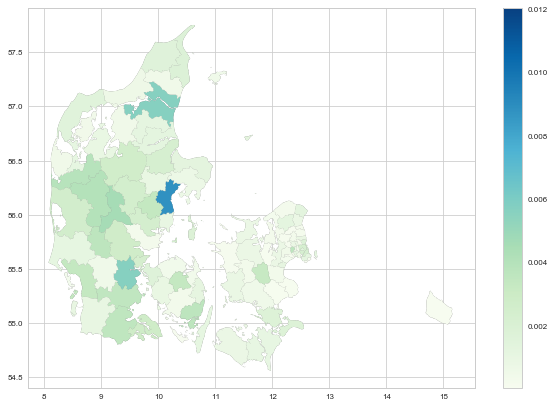

In [449]:
#Creating plot of arrivals per capita in municipality
fig, ax = plt.subplots(1, figsize=(10,7))
base = shp.plot(ax=ax, color='gray')
#gdf.plot(ax=base, marker="o", markersize=5, alpha=0.5)
dep_df_num_pcd.plot(ax=base, column='per_capita', cmap='GnBu', alpha=1, legend=True)
leg = ax.get_legend()
fig.savefig('departure_per_capita.png')

# Plotting relative arrivals per capita in municipalities

In [450]:
#Creating the sample for relative arrivals
sample_PCA = df 

In [451]:
# Using the longitude and latitude for departure as coordinates
sample_PCA['Coordinates'] = list(zip(sample_PCA.longitude_arr, sample_PCA.latitude_arr))
sample_PCA['Coordinates'] = sample_PCA['Coordinates'].apply(Point)
garr = gp.GeoDataFrame(sample_PCA, geometry='Coordinates')
garr.head()

,id,depart_date_time,seats,free_seats,user_id,handle_fee_rate,handle_fee_ceiling_factor,accept_cash,accept_online_payment,quick_booking,...,time_minute_hour,time_cat,Night,Morning,Forenoon,Noon,Afternoon,Evening,Late_evening,Coordinates
index_left,,,,,,,,,,,,,,,,,,,,,
0,7385002,2018-08-07T15:30:00+02:00,2,0,269889,12.5,100,False,True,True,...,15.50,Afternoon,0,0,0,0,1,0,0,POINT (9.8968571 56.0251671)
1,7385006,2018-08-07T14:00:00+02:00,3,3,1399528,12.5,100,False,True,True,...,14.00,Noon,0,0,0,1,0,0,0,POINT (12.5683372 55.6760968)
2,7385007,2018-08-09T08:30:00+02:00,1,0,1438456,12.5,100,False,True,True,...,8.50,Morning,0,1,0,0,0,0,0,POINT (9.237394 55.844405)
3,7385010,2018-08-07T06:45:00+02:00,3,3,906186,12.5,100,False,True,True,...,6.75,Morning,0,1,0,0,0,0,0,POINT (8.7034921 56.95916800000001)
4,7385011,2018-08-10T16:15:00+02:00,2,1,2318925,12.5,100,False,True,False,...,16.25,Afternoon,0,0,0,0,1,0,0,POINT (9.5282372 55.7134411)


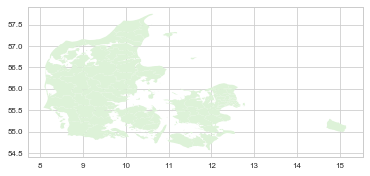

In [452]:
#Including map from http://www.diva-gis.org/datadown (also see bibliography)
shp = gp.GeoDataFrame.from_file('/Users/victoriamariastokholmhundevad/Downloads/DNK_adm/DNK_adm2.shp') #denne virker kun hos Emma - læg op
shp.plot()

In [453]:
#Converting the coordinates to same format
shp.crs = {'init': 'epsg:4326'} 
garr.crs = {'init': 'epsg:4326'}

dk_rides__PCA = gp.tools.sjoin(garr, shp, how="right", op='intersects')
dk_rides__PCA

,index_left,id,depart_date_time,seats,free_seats,user_id,handle_fee_rate,handle_fee_ceiling_factor,accept_cash,accept_online_payment,...,NAME_0,ID_1,NAME_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
index_right,,,,,,,,,,,,,,,,,,,,,
44,0.0,7385002.0,2018-08-07T15:30:00+02:00,2.0,0.0,269889.0,12.5,100.0,False,True,...,Denmark,2,Midtjylland,45,Skanderborg,Kommune,Municipality,None,None,(POLYGON ((10.01367568969732 55.98131561279308...
44,5.0,7385035.0,2018-08-06T20:30:00+02:00,3.0,3.0,734681.0,12.5,100.0,False,True,...,Denmark,2,Midtjylland,45,Skanderborg,Kommune,Municipality,None,None,(POLYGON ((10.01367568969732 55.98131561279308...
44,149.0,7385709.0,2018-08-07T12:40:00+02:00,5.0,0.0,57855.0,12.5,100.0,False,True,...,Denmark,2,Midtjylland,45,Skanderborg,Kommune,Municipality,None,None,(POLYGON ((10.01367568969732 55.98131561279308...
44,211.0,7386006.0,2018-08-07T07:30:00+02:00,3.0,3.0,541988.0,12.5,100.0,False,True,...,Denmark,2,Midtjylland,45,Skanderborg,Kommune,Municipality,None,None,(POLYGON ((10.01367568969732 55.98131561279308...
44,242.0,7386127.0,2018-08-07T10:20:00+02:00,2.0,2.0,267139.0,12.5,100.0,False,True,...,Denmark,2,Midtjylland,45,Skanderborg,Kommune,Municipality,None,None,(POLYGON ((10.01367568969732 55.98131561279308...
44,243.0,7386133.0,2018-08-07T16:00:00+02:00,2.0,2.0,814817.0,12.5,100.0,False,True,...,Denmark,2,Midtjylland,45,Skanderborg,Kommune,Municipality,None,None,(POLYGON ((10.01367568969732 55.98131561279308...
44,247.0,7386147.0,2018-08-07T13:30:00+02:00,2.0,2.0,56642.0,12.5,100.0,False,True,...,Denmark,2,Midtjylland,45,Skanderborg,Kommune,Municipality,None,None,(POLYGON ((10.01367568969732 55.98131561279308...
44,255.0,7386173.0,2018-08-08T10:25:00+02:00,2.0,2.0,267139.0,12.5,100.0,False,True,...,Denmark,2,Midtjylland,45,Skanderborg,Kommune,Municipality,None,None,(POLYGON ((10.01367568969732 55.98131561279308...
44,261.0,7386185.0,2018-08-09T10:25:00+02:00,2.0,2.0,267139.0,12.5,100.0,False,True,...,Denmark,2,Midtjylland,45,Skanderborg,Kommune,Municipality,None,None,(POLYGON ((10.01367568969732 55.98131561279308...


In [454]:
#Getting number of rides per municipality
num_rides_per_district_PCA = dk_rides__PCA.groupby("NAME_2").size()
num_rides_per_district_PCA = num_rides_per_district_PCA.to_frame(name="arr_num").reset_index()
num_rides_per_district_PCA.head()

,NAME_2,arr_num
0,Aabenraa,164
1,Aalborg,1168
2,Albertslund,106
3,Allerød,10
4,Assens,41


In [455]:
#Merging the dataset of geo with numbers
new_df_PCA = pd.merge(pop_mun, num_rides_per_district_PCA, how='left', on=['NAME_2'])

In [456]:
#Creating new variable: arrival per capita in municipality
new_df_PCA['per_capita'] = new_df_PCA['arr_num']*1/new_df_PCA['Pop']*1
new_df_PCA.head()

,NAME_2,Pop,arr_num,per_capita
0,København,613288.0,1402,0.002286
1,Frederiksberg,104410.0,110,0.001054
2,Dragør,14272.0,3,0.000210
3,Tårnby,43063.0,64,0.001486
4,Albertslund,27743.0,106,0.003821


In [457]:
#Merging new dataset with map of Denmark
arr_ride_num_PCA = pd.merge(shp, new_df_PCA, on="NAME_2", how="right")

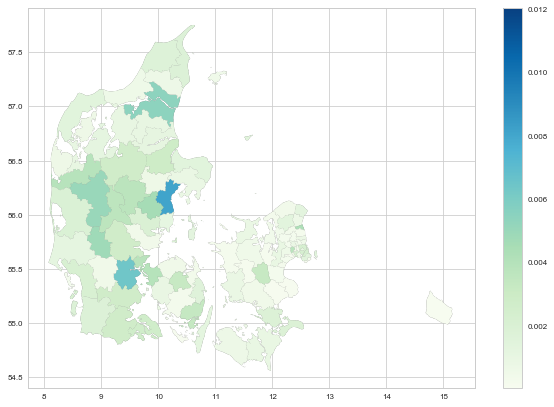

In [458]:
#Creating plot of arrivals per capita in municipality
fig, ax = plt.subplots(1, figsize=(10,7))
base = shp.plot(ax=ax, color='gray')
#gdf.plot(ax=base, marker="o", markersize=5, alpha=0.5)
arr_ride_num_PCA.plot(ax=base, column='per_capita', cmap='GnBu', alpha=1, legend=True)
leg = ax.get_legend()
fig.savefig('arrival_per_capita.png')

# Descriptive analysis

# Code for plots

## A) Colors & Style

['#ddf2d8', '#c2e7c0', '#95d6bb', '#61bdcd', '#3597c4', '#0d6dae']

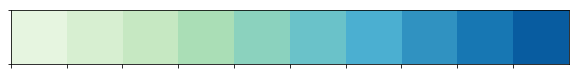

In [5]:
sns.palplot(sns.color_palette("GnBu", 10))
pal = sns.color_palette("GnBu")
pal.as_hex()

In [6]:
sns.set_style('whitegrid')
sns.despine(left=True, top=True, right=True, bottom=False)

<Figure size 432x288 with 0 Axes>

In [461]:
import geopandas as gp #conda install geopandas
from shapely.geometry import Point

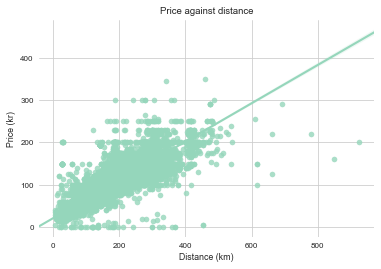

In [463]:
#scatterplot - pris mod distance
fig1 = sns.regplot(x=df['distance_KM'], y=df['price_DKK'], scatter=True, fit_reg=True, order=1, color='#95d6bb')
sns.set_style('whitegrid')
sns.despine(left=True, top=True, right=True, bottom=True)
sns.set_context('paper')
plt.xlabel('Distance (km)')
plt.ylabel('Price (kr)')
plt.title('Price against distance')
plt.show()
fig = fig1.get_figure()
fig.savefig("scatterplot_outliers.png")

In [464]:
outlier = df['distance_KM'] > 1500000
print(df[outlier]['name_dep'])
print(df[outlier]['name_arr'])

#drop outliers
df = df.drop(df[outlier == True].index)

Series([], Name: name_dep, dtype: object)
Series([], Name: name_arr, dtype: object)


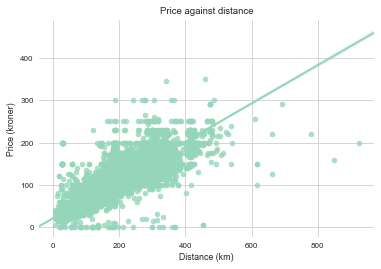

In [465]:
#scatterplot uden outliers
fig_no_outlier = sns.regplot(x=df['distance_KM'], y=df['price_DKK'], scatter=True, fit_reg=True, order=1, color='#95d6bb')
sns.set_style('whitegrid')
sns.despine(left=True, top=True, right=True, bottom=True)
sns.set_context('paper')
plt.xlabel('Distance (km)')
plt.ylabel('Price (kroner)')
plt.title('Price against distance')
plt.show()
fig = fig_no_outlier.get_figure()
fig.savefig("scatterplot_no_outliers.png")

### Price, Distance, Geography and Toll roads - Supplied

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


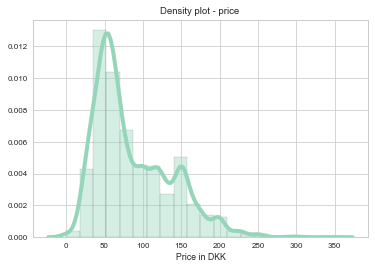

In [466]:
# Density Plot and Histogram of price
sns.distplot(df['price_DKK'], hist=True, kde=True, 
             bins=int(20), color = '#95d6bb', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
sns.set_style('white')
sns.despine(left=True, right=True, top=True)
plt.xlabel('Price in DKK', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Density Distribution of Price ', fontsize=15)

plt.savefig('Density_price.png', )

In [8]:
#Slicing data - Keeping only observations for 3 weeks. From wednesday in week 31 to tuesday in week 34
df3 = df\
    .groupby(['week_number', 'weekday'])\
    ['id']\
    .count()

df3 = pd.DataFrame(data=df3)
df3.reset_index(inplace=True)

df_mean = df3[(df3['week_number']>= 31) & (df3['week_number']<= 34)]
df_mean.reset_index()

df_4weeks = df_mean.iloc[0:21,:]

NameError: name 'df' is not defined

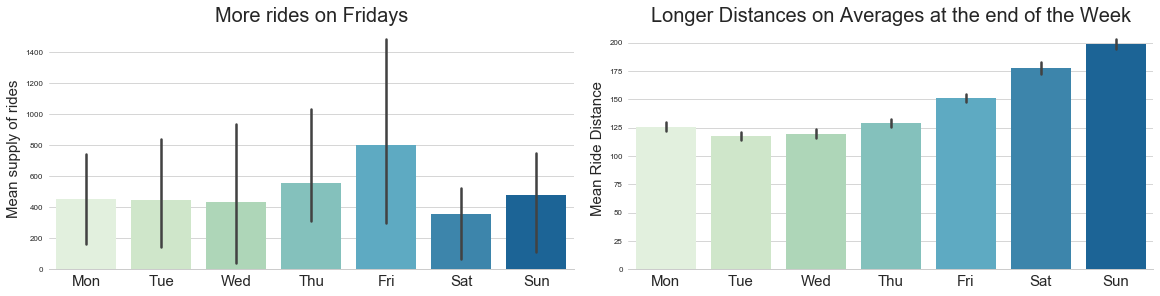

In [470]:
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(16,4), constrained_layout=True, sharex=True)
sns.set_style('whitegrid')
sns.despine(left=True, top=True, right=True, bottom=False)
# sns.set_context('talk')

sns.barplot(x='weekday', y='id', data=df_4weeks, palette='GnBu', ax=ax0)
ax0.set_ylabel('Mean supply of rides', fontsize=15)
ax0.set_xlabel('')
ax0.set_title('More rides on Fridays', fontsize=20)
ax0.set_xticklabels(labels= ('Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'), fontsize=15)

sns.barplot(x='weekday', y='distance_KM', data=df, palette='GnBu', ax=ax1)
ax1.set_ylabel('Mean Ride Distance', fontsize=15)
ax1.set_xlabel('')
ax1.set_title('Longer Distances on Averages at the end of the Week', fontsize=20)
ax1.set_xticklabels(labels= ('Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'), fontsize=15)

# plt.xticks(np.arange(7), ('Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'), fontsize=20)

plt.savefig('distance_weekday_final.png')

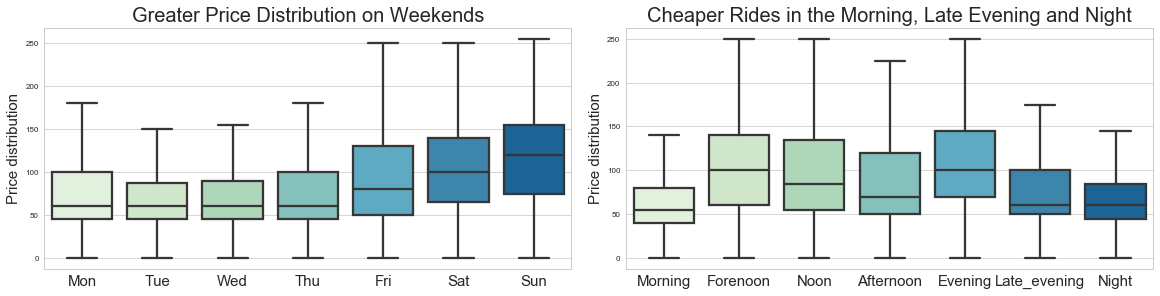

In [360]:
## How does prices vary over days and time of the day?
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(16,4), constrained_layout=True)
sns.set_context('talk')
sns.boxplot(x = 'weekday', y='price_DKK', data = df, palette='GnBu', ax=ax0, showfliers=False )
ax0.set_ylabel('Price distribution', fontsize=15)
ax0.set_xlabel('')
ax0.set_xticklabels(labels=('Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'), fontsize=15)
ax0.set_title('Greater Price Distribution on Weekends', fontsize=20)

ord = ['Morning', 'Forenoon', 'Noon', 'Afternoon', 'Evening', 'Late_evening', 'Night']
sns.boxplot(y='price_DKK', x='time_cat', data=df, order = ord, palette='GnBu', ax=ax1, showfliers=False)
ax1.set_ylabel('Price distribution', fontsize=15)
ax1.set_xlabel('')
ax1.set_xticklabels(labels=('Morning', 'Forenoon', 'Noon', 'Afternoon', 'Evening', 'Late_evening', 'Night'),fontsize=15)
ax1.set_title('Cheaper Rides in the Morning, Late Evening and Night', fontsize=20)


plt.savefig('pricedistribution_weekdays_and_timecat.png')

In [361]:
df_crosstab = pd.crosstab(df["time_cat"], df["weekday"], values=df["price_DKK"], aggfunc='mean').round(0) 

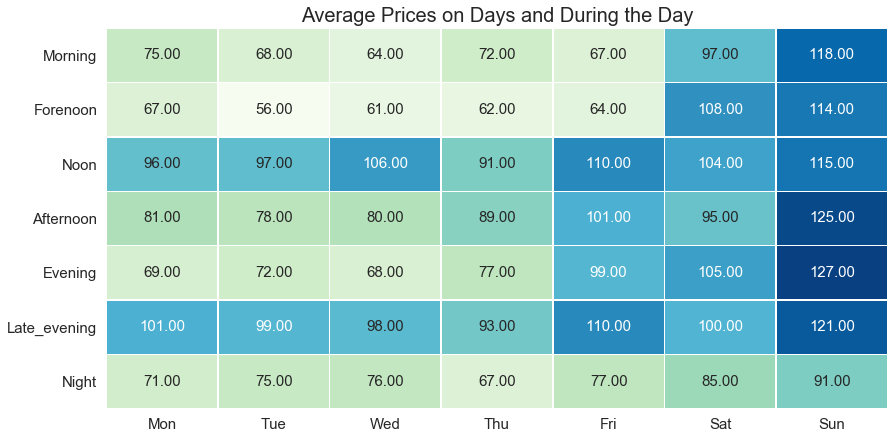

In [362]:
# fig, ax = plt.subplots(figsize=(10,10)
#Heatmap
plt.subplots(figsize=(14,7))
y_names = ['Morning', 'Forenoon', 'Noon', 'Afternoon', 'Evening', 'Late_evening', 'Night']
x_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sns.heatmap(df_crosstab, annot=True, cmap="GnBu", cbar=False, linewidths=.5, fmt='.0f', annot_kws={'size':15}, yticklabels=y_names, xticklabels=x_names)
# sns.set_context('talk')
# plt.xticks(np.arange(7), ('Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'))
# plt.yticks(np.arange(7), ('Morning', 'Forenoon', 'Noon', 'Afternoon', 'Evening', 'Late_evening', 'Night'))
plt.xlabel('')
plt.ylabel('')
plt.title('Average Prices on Days and During the Day', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15, rotation='horizontal')
plt.savefig("HeatmapWeekdays.png")

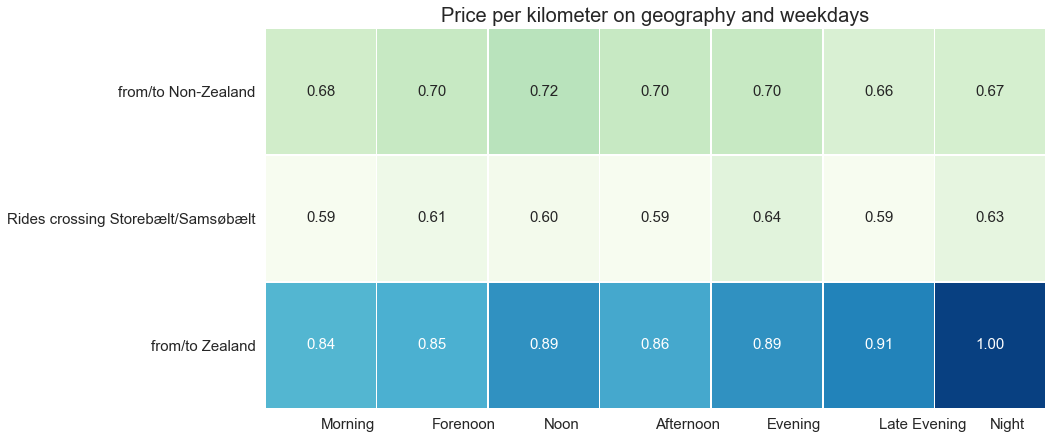

<Figure size 432x288 with 0 Axes>

In [363]:
# Krydstabel: 
df_crosstab = pd.crosstab(df["toll_road"], df["weekday"], values=df["DKK_per_KM"], aggfunc='mean').round(2) 

#Heatmap
plt.subplots(figsize=(14,7))
x_names = ['Morning', 'Forenoon', 'Noon', 'Afternoon', 'Evening', 'Late Evening', 'Night']
y_names = ['from/to Non-Zealand', 'Rides crossing Storebælt/Samsøbælt', 'from/to Zealand']
sns.heatmap(df_crosstab, annot=True, cmap="GnBu", cbar=False,
            fmt='.2f', annot_kws={'size':15}, linewidths=.5, yticklabels=y_names, xticklabels=x_names)
plt.xticks(ha='left', fontsize=15)
# labels = ['from/to Non-Zealand', 'Rides crossing Storebælt/Samsøbælt', 'from/to Zealand']
plt.yticks(fontsize=15)  #rotation='horizontal'
plt.xticks(fontsize=15)
plt.title('Price per kilometer on geography and weekdays', fontsize=20)
plt.xlabel('')
plt.ylabel('')

# # Shift ticks to be at 0.5, 1.5, etc
# for axis in [ax.xaxis, ax.yaxis]:
#     axis.set(ticks=np.arange(0.5, len(labels)), ticklabels=labels)

plt.show()

plt.savefig("HeatmapBetalingsvej_Weekday.png")

### Demand - Seats og taken seats
How does the demand vary over days and time? Does the price show that? 

In [1]:
def stacked_bar(data, series_labels, category_labels=None, 
                show_values=False, value_format="{}", y_label=None, 
                grid=True, reverse=False):
    """Plots a stacked bar chart with the data and labels provided.

    Keyword arguments:
    data            -- 2-dimensional numpy array or nested list
                       containing data for each series in rows
    series_labels   -- list of series labels (these appear in
                       the legend)
    category_labels -- list of category labels (these appear
                       on the x-axis)
    show_values     -- If True then numeric value labels will 
                       be shown on each bar
    value_format    -- Format string for numeric value labels
                       (default is "{}")
    y_label         -- Label for y-axis (str)
    grid            -- If True display grid
    reverse         -- If True reverse the order that the
                       series are displayed (left-to-right
                       or right-to-left)
    """

    ny = len(data[0])
    ind = list(range(ny))

    axes = []
    cum_size = np.zeros(ny)

    data = np.array(data)
       

    if reverse:
        data = np.flip(data, axis=1)
        category_labels = reversed(category_labels)

    for i, row_data in enumerate(data):
        axes.append(plt.bar(ind, row_data, bottom=cum_size, 
                            label=series_labels[i]))
        cum_size += row_data

    if category_labels:
        plt.xticks(ind, category_labels)

    if y_label:
        plt.ylabel(y_label)

    plt.legend()

    if grid:
        plt.grid()

    if show_values:
        for axis in axes:
            for bar in axis:
                w, h = bar.get_width(), bar.get_height()
                plt.text(bar.get_x() + w/2, bar.get_y() + h/2, 
                         value_format.format(h), ha="center", 
                         va="center")

### Average Number of Free and Taken Seats 

In [ ]:
# Creating input to stacked bar plot - Free Sats
df3FS = df\
    .groupby(['week_number', 'weekday'])\
    ['free_seats']\
    .sum()

df3FS = pd.DataFrame(data=df3FS)
df3FS.reset_index(inplace=True)

df_meanFS = df3FS[(df3FS['week_number']>= 31) & (df3FS['week_number']<= 34)]
df_meanFS.reset_index()

df3FS = df_meanFS.iloc[0:21,:]
df3FS_sum = df3FS.groupby('weekday').mean()
df3FS_sum = df3FS_sum.drop(['week_number'], axis=1)
df3FS_sum = df3FS_sum.iloc[:,0]
df3FS_sum

In [ ]:
# Creating input to stacked bar plot - Taken Sats
df3TS = df\
    .groupby(['week_number', 'weekday'])\
    ['taken_seats']\
    .sum()

df3TS = pd.DataFrame(data=df3TS)
df3TS.reset_index(inplace=True)

df_meanTS = df3TS[(df3TS['week_number']>= 31) & (df3TS['week_number']<= 34)]
df_meanTS.reset_index()

df3TS = df_meanTS.iloc[0:21,:]
df3TS_sum = df3TS.groupby('weekday').mean()
df3TS_sum = df3TS_sum.drop(['week_number'], axis=1)
df3TS_sum = df3TS_sum.iloc[:,0]
df3TS_sum

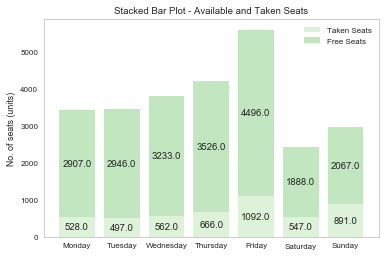

In [372]:
plt.figure(figsize=(9, 3))
sns.set_palette('GnBu')
sns.set_style('whitegrid')
sns.despine(left=True, top=True, right=True, bottom=False)
series_labels = ['Taken Seats', 'Free Seats']

data = [
    df3TS_sum,
    df3FS_sum
]

category_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

stacked_bar(
    data, 
    series_labels, 
    category_labels=category_labels, 
    show_values=True,
    value_format="{:.0f}",
    y_label="Average No. of Seats",
    )

plt.ylabel("Average No. of Seats", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.title('Available and Taken Seats\n', fontsize=16)
plt.savefig('stackedbarplot.png')
plt.show()

### Is the price affexted by other categorical variables -  kids, music, smoking, flexbooking and quickbooking and detour\_pref

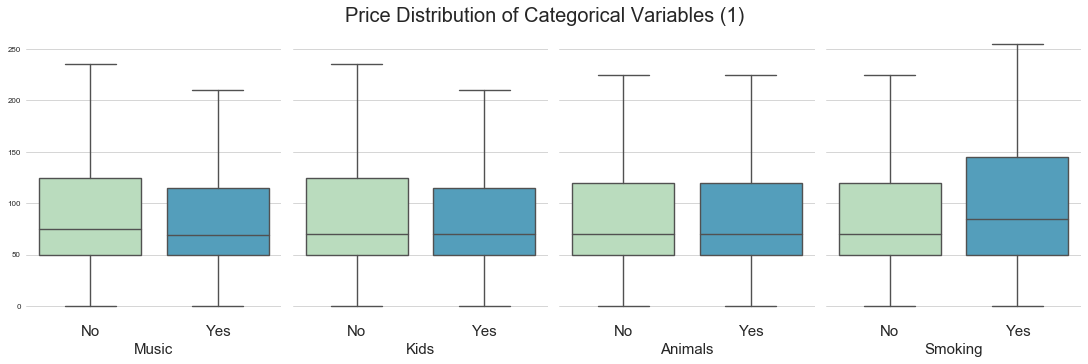

In [373]:
f, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, figsize=(15,5), constrained_layout=True, sharey=True)
sns.set_palette('GnBu')
sns.set_style('whitegrid')
sns.despine(left=True, top=True, right=True, bottom=True)
sns.boxplot(x="music", y='price_DKK', data=df, ax=ax0, palette='GnBu', showfliers=False)
sns.boxplot(x="kids",  y='price_DKK', data=df, ax=ax1, palette='GnBu', showfliers=False)
sns.boxplot(x="animals",  y='price_DKK', data=df, ax=ax2, palette='GnBu', showfliers=False)
sns.boxplot(x="smoking",  y='price_DKK', data=df, ax=ax3, palette= 'GnBu', showfliers=False)

ax0.set_ylabel('')
ax0.set_xlabel('Music', fontsize=15)
ax0.set_xticklabels(labels=('No', 'Yes'), fontsize=15)

ax1.set_ylabel('')
ax1.set_xlabel('Kids', fontsize=15)
ax1.set_xticklabels(labels=('No', 'Yes'), fontsize=15)

ax2.set_ylabel('')
ax2.set_xlabel('Animals', fontsize=15)
ax2.set_xticklabels(labels=('No', 'Yes'), fontsize=15)

ax3.set_ylabel('')
ax3.set_xlabel('Smoking', fontsize=15)
ax3.set_xticklabels(labels=('No', 'Yes'), fontsize=15)

f.suptitle('Price Distribution of Categorical Variables (1)', fontsize=20)
plt.savefig("boxplot_categorical_smokingKids.png")

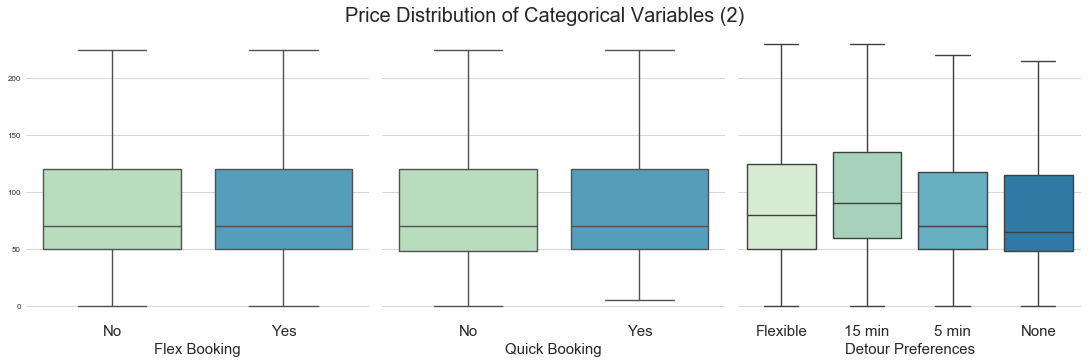

In [374]:
f, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(15,5), constrained_layout=True, sharey=True)
sns.set_palette('GnBu')
sns.set_style('whitegrid')
sns.despine(left=True, top=True, right=True, bottom=True)
sns.boxplot(x='flex_booking', y='price_DKK', data=df, ax=ax0, palette='GnBu', showfliers=False)
sns.boxplot(x='quick_booking', y='price_DKK', data=df, ax=ax1, palette='GnBu', showfliers=False)
order_pref = ['flexible', '15_minutes', '5_minutes', 'none']
sns.boxplot(x='detour_preference', y='price_DKK', data=df, ax=ax2, palette='GnBu', showfliers=False, order=order_pref)

ax0.set_ylabel('')
ax0.set_xlabel('Flex Booking', fontsize=15)
ax0.set_xticklabels(labels=('No', 'Yes'), fontsize=15)

ax1.set_ylabel('')
ax1.set_xlabel('Quick Booking', fontsize=15)
ax1.set_xticklabels(labels=('No', 'Yes'), fontsize=15)

ax2.set_ylabel('')
ax2.set_xlabel('Detour Preferences', fontsize=15)
ax2.set_xticklabels(labels=('Flexible', '15 min','5 min','None'), fontsize=15)

f.suptitle('Price Distribution of Categorical Variables (2)', fontsize=20)
plt.savefig("boxplot_categorical_booking.png")

### Scatter

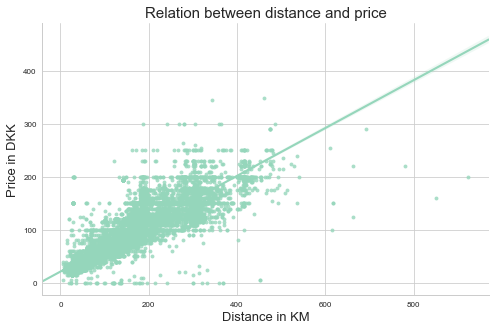

In [375]:
# use the function regplot to make a scatterplot
plt.subplots(ncols=1, figsize=(8,5))
sns.regplot(x=df["distance_KM"], y=df["price_DKK"], color = '#95d6bb', marker='o', scatter_kws={'s':15})
sns.despine(left= False, right=True, bottom=False, top=True)
plt.xlabel('Distance in KM', fontsize=13)
plt.ylabel('Price in DKK', fontsize=13)
plt.title('Relation between distance and price', fontsize=15)

plt.savefig('regression_distance_price.png')

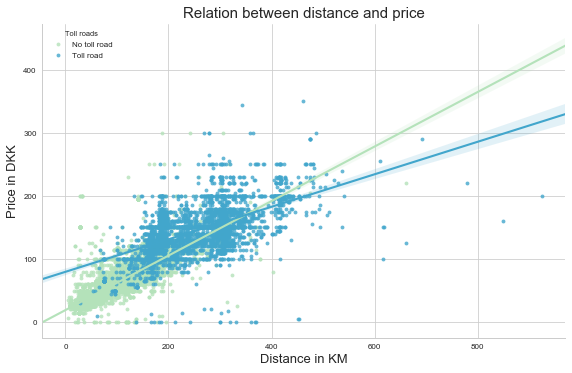

In [376]:
#Lmplot to show the relation with and without toll
g = sns.lmplot(x="distance_KM", y="price_DKK", data=df, palette='GnBu' , 
           scatter_kws={"s": 15}, ci=99, hue='toll_road_bool', size=5, aspect=1.6,
          legend_out=False)
sns.despine(left= False, right=True, bottom=False, top=True)
plt.xlabel('Distance in KM', fontsize=13)
plt.ylabel('Price in DKK', fontsize=13)
plt.title('Relation between distance and price', fontsize=15)
leg = g.axes.flat[0].get_legend()
new_title = 'Toll roads'
leg.set_title(new_title)
new_labels = ['No toll road', 'Toll road']
for t, l in zip(leg.texts, new_labels): t.set_text(l)
plt.savefig('regression_distance_price_toll.png')